In [1]:
import librosa
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.model_selection import train_test_split
from laughter_prediction.feature_extractors import LibrosaExtractor
from laughter_classification.sspnet_data_sampler import SSPNetDataSampler
from sklearn.metrics import roc_auc_score

np.random.seed(239566)
random.seed(566239)
torch.manual_seed(123456)

In [2]:
sampler = SSPNetDataSampler('vocalizationcorpus/')
data = sampler.create_sampled_df(0.5, save_path='voc_samples.csv')

Already created


In [3]:
noised_sampler = SSPNetDataSampler('noisedcorpus/')
noised_data = noised_sampler.create_sampled_df(0.5, save_path='noised_voc_samples.csv')

Already created


In [4]:
data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V140,V141,V142,V143,V144,V145,V146,V147,IS_LAUGHTER,SNAME
0,710.280301,32.296082,15.100976,29.155917,-4.035246,22.141798,-15.877404,13.819571,-2.928351,-9.046097,...,4.666456e+05,4.967411e+05,2.945196e+05,2.424304e+05,2.456876e+05,2.496487e+05,1.374698e+05,1.086777e+04,0,S0001
1,738.894182,33.270312,-8.896365,28.976984,-1.463971,22.653504,-19.169333,7.855803,3.247973,-4.348825,...,4.606869e+05,4.389916e+05,2.550068e+05,2.693860e+05,2.591865e+05,2.450111e+05,1.299235e+05,8.914057e+03,0,S0001
2,732.063305,28.093583,-7.856727,42.377710,8.221286,9.062156,-18.082906,22.532473,-2.522692,-7.750239,...,3.952451e+05,3.672509e+05,2.701146e+05,2.561910e+05,2.239744e+05,3.044547e+05,1.585925e+05,8.991437e+03,0,S0001
3,723.174160,32.023518,2.303862,34.736015,3.108389,15.023474,-19.914213,16.908220,-1.869721,-8.403829,...,3.734330e+05,4.123513e+05,2.900820e+05,2.749145e+05,2.488542e+05,2.255658e+05,1.297943e+05,9.397050e+03,0,S0001
4,751.975339,49.758109,-6.962803,12.145658,-10.023156,17.142958,-21.148434,11.957944,-1.486391,-3.380699,...,4.240343e+05,3.482006e+05,2.732751e+05,2.433398e+05,2.527075e+05,2.857710e+05,1.290958e+05,1.082188e+04,0,S0001
5,728.528137,35.203354,-0.898740,26.806470,-0.633135,15.363349,-20.767399,18.022607,1.274400,-8.413334,...,4.726382e+05,3.945124e+05,2.552302e+05,2.445708e+05,2.369451e+05,2.522664e+05,1.263436e+05,9.995074e+03,0,S0001
6,944.566054,53.466879,-3.738911,23.103916,-20.192846,3.779564,-15.210320,3.053985,-16.045345,-2.520365,...,7.154919e+07,4.485638e+07,4.237614e+07,3.922501e+07,4.485561e+07,4.461703e+07,1.743706e+07,3.602366e+06,0,S0001
7,956.145513,81.679584,-13.410129,37.507962,-17.838598,2.055783,-30.230427,-3.990821,-26.749682,-12.020194,...,1.008704e+07,6.411863e+06,9.381725e+06,5.668731e+06,5.969801e+06,3.396047e+06,1.488511e+06,5.005656e+05,0,S0001
8,970.154268,91.288379,-18.869130,21.615647,-19.669285,-1.052364,-20.929422,9.221561,-13.550095,-4.838796,...,5.566140e+07,3.443465e+07,2.589392e+07,2.375578e+07,2.491516e+07,1.323368e+07,6.677672e+06,1.131687e+06,0,S0001
9,1087.466253,65.142427,-15.928131,-2.274221,-16.237941,-7.999038,-15.462301,0.376272,1.803008,0.457350,...,1.434537e+09,1.468456e+09,2.895322e+09,6.507531e+09,5.769567e+09,1.394288e+09,4.589850e+08,8.511996e+07,0,S0001


In [5]:
def create_indexes(data):
    index = data['SNAME'].unique()
    return train_test_split(index)
    
def prepare_data(data, train_index, test_index):
    train_data = np.array(data[data['SNAME'].isin(train_index)].drop(columns='SNAME'))
    test_data = np.array(data[data['SNAME'].isin(test_index)].drop(columns='SNAME'))

    X_train = train_data[:, :-1].reshape(len(train_index), 22, 148)
    y_train = train_data[:, -1].reshape(len(train_index), 22)
    X_test = test_data[:, :-1].reshape(len(test_index), 22, 148)
    y_test = test_data[:, -1].reshape(len(test_index), 22)
    return X_train, y_train, X_test, y_test

In [6]:
train_index, test_index = create_indexes(data)
clear_train_test = prepare_data(data, train_index, test_index)
noise_train_test = prepare_data(noised_data, train_index, test_index)

In [7]:
class MyLSTM(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(MyLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size)
        self.classifier = nn.Linear(hidden_size, output_size)
        self.hidden = None

    def init_hidden(self, batch_size):
        return (torch.zeros(1, batch_size, self.hidden_size),
                torch.zeros(1, batch_size, self.hidden_size))

    def forward(self, sound, batch_size):
        result, self.hidden = self.rnn(sound)
        return F.log_softmax(self.classifier(result), dim=-1)
    

In [26]:
def train_on_data(train_test, n_epoch=100, hidden=64, lr=0.02):
    X_train, y_train, X_test, y_test = train_test
    model = MyLSTM(148, hidden, 2)
    loss_function = nn.NLLLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []
    test_auc = []
    for epoch in range(n_epoch):
        model.train()
        model.zero_grad()
        model.hidden = model.init_hidden(len(X_train))
        class_scores = model(torch.tensor(X_train, dtype=torch.float), len(X_train))
        targets = torch.tensor(y_train, dtype=torch.long)
        loss = loss_function(class_scores.reshape(-1, 2), targets.reshape(-1))
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    
        with torch.no_grad():
            model.eval()
            model.hidden = model.init_hidden(len(X_test))
            class_scores = model(torch.tensor(X_test, dtype=torch.float), len(X_test))
            targets = torch.tensor(y_test, dtype=torch.long)
            loss = loss_function(class_scores.reshape(-1, 2), targets.reshape(-1))
            test_losses.append(loss.item())
            num_targets = targets.numpy().reshape(-1)
            num_scores = class_scores.numpy().reshape(-1, 2)[:, 1]
            test_auc.append(roc_auc_score(num_targets, num_scores))
        print("Epoch finished", epoch, "train_loss =", train_losses[-1], "test_loss =", test_losses[-1], "AUC =", test_auc[-1])
    return model, train_losses, test_losses, test_auc

In [27]:
clear_res = train_on_data(clear_train_test)

Epoch finished 0 train_loss = 0.6839808821678162 test_loss = 0.5404556393623352 AUC = 0.49870109235025517
Epoch finished 1 train_loss = 0.5451424717903137 test_loss = 0.4340362250804901 AUC = 0.5026990083900391
Epoch finished 2 train_loss = 0.43796220421791077 test_loss = 0.3549628257751465 AUC = 0.5067633345394178
Epoch finished 3 train_loss = 0.3586723804473877 test_loss = 0.29794996976852417 AUC = 0.5103451583119594
Epoch finished 4 train_loss = 0.3018823266029358 test_loss = 0.2576475441455841 AUC = 0.5136383588086082
Epoch finished 5 train_loss = 0.2621018588542938 test_loss = 0.2295135259628296 AUC = 0.5165468883501987
Epoch finished 6 train_loss = 0.23466292023658752 test_loss = 0.21003732085227966 AUC = 0.5193641039910967
Epoch finished 7 train_loss = 0.21596349775791168 test_loss = 0.19664877653121948 AUC = 0.5220227723558863
Epoch finished 8 train_loss = 0.20336975157260895 test_loss = 0.18751530349254608 AUC = 0.5244527786387766
Epoch finished 9 train_loss = 0.19501188397407

Epoch finished 77 train_loss = 0.16209955513477325 test_loss = 0.15262961387634277 AUC = 0.644001198126192
Epoch finished 78 train_loss = 0.1619519144296646 test_loss = 0.15248842537403107 AUC = 0.6441981644739668
Epoch finished 79 train_loss = 0.16180738806724548 test_loss = 0.1523497998714447 AUC = 0.6444214753280267
Epoch finished 80 train_loss = 0.16166290640830994 test_loss = 0.15221358835697174 AUC = 0.6446377198171197
Epoch finished 81 train_loss = 0.16152216494083405 test_loss = 0.15207943320274353 AUC = 0.6448648725783465
Epoch finished 82 train_loss = 0.1613842099905014 test_loss = 0.15194754302501678 AUC = 0.6451513690842006
Epoch finished 83 train_loss = 0.1612473577260971 test_loss = 0.15181803703308105 AUC = 0.6454554285942448
Epoch finished 84 train_loss = 0.1611136943101883 test_loss = 0.1516907662153244 AUC = 0.6457974269375596
Epoch finished 85 train_loss = 0.16098137199878693 test_loss = 0.15156538784503937 AUC = 0.6461556847808473
Epoch finished 86 train_loss = 0.16

In [28]:
noise_res = train_on_data(noise_train_test)

Epoch finished 0 train_loss = 0.5911146402359009 test_loss = 0.17105229198932648 AUC = 0.4333757040809424
Epoch finished 1 train_loss = 0.1784067451953888 test_loss = 0.15058085322380066 AUC = 0.5056468488746024
Epoch finished 2 train_loss = 0.16120238602161407 test_loss = 0.14969123899936676 AUC = 0.7233306124397936
Epoch finished 3 train_loss = 0.16111797094345093 test_loss = 0.1450604647397995 AUC = 0.7648061270735493
Epoch finished 4 train_loss = 0.15519943833351135 test_loss = 0.1386447548866272 AUC = 0.7834195498464815
Epoch finished 5 train_loss = 0.14792762696743011 test_loss = 0.13233207166194916 AUC = 0.7922254754943265
Epoch finished 6 train_loss = 0.14109598100185394 test_loss = 0.1283009648323059 AUC = 0.796377891086597
Epoch finished 7 train_loss = 0.13617175817489624 test_loss = 0.12704907357692719 AUC = 0.8060800101865425
Epoch finished 8 train_loss = 0.13438889384269714 test_loss = 0.12807369232177734 AUC = 0.8124353479059617
Epoch finished 9 train_loss = 0.13434472680

Epoch finished 77 train_loss = 0.09108541160821915 test_loss = 0.09994238615036011 AUC = 0.8886246891656984
Epoch finished 78 train_loss = 0.09088101983070374 test_loss = 0.1000535786151886 AUC = 0.8882636871030059
Epoch finished 79 train_loss = 0.09079175442457199 test_loss = 0.10020813345909119 AUC = 0.8883054678434429
Epoch finished 80 train_loss = 0.09052126109600067 test_loss = 0.10020215809345245 AUC = 0.8884722477777656
Epoch finished 81 train_loss = 0.09015695750713348 test_loss = 0.09996892511844635 AUC = 0.8876727880596819
Epoch finished 82 train_loss = 0.08984403312206268 test_loss = 0.10009264945983887 AUC = 0.8876503540660481
Epoch finished 83 train_loss = 0.08955685049295425 test_loss = 0.10000841319561005 AUC = 0.8886368323365642
Epoch finished 84 train_loss = 0.08950501680374146 test_loss = 0.09957803040742874 AUC = 0.8901158293847448
Epoch finished 85 train_loss = 0.08911306411027908 test_loss = 0.09973488003015518 AUC = 0.8895050347507365
Epoch finished 86 train_loss 

In [31]:
import matplotlib.pyplot as plt

In [32]:
def show_loss_plot(res, title):
    _, train_losses, test_losses, _ = res
    plt.plot(range(len(train_losses)), train_losses)
    plt.plot(range(len(test_losses)), test_losses)
    plt.legend(['Train loss', 'Test loss'])
    plt.title(title)
    plt.show()
    
def show_auc_plot(res1, res2, leg1, leg2, title):
    _, _, _, auc1 = res1
    _, _, _, auc2 = res2
    plt.plot(range(len(auc1)), auc1)
    plt.plot(range(len(auc2)), auc2)
    plt.legend([leg1, leg2])
    plt.title(title)
    plt.show()

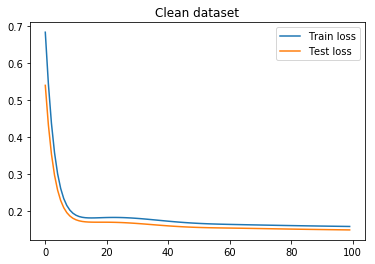

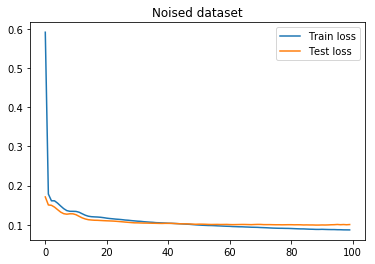

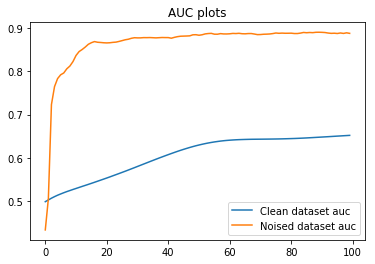

In [33]:
show_loss_plot(clear_res, "Clean dataset")
show_loss_plot(noise_res, "Noised dataset")
show_auc_plot(clear_res, noise_res, "Clean dataset auc", "Noised dataset auc", "AUC plots")